About this Dataset: Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = disney_overall = pd.read_csv("disney_plus_titles.csv")
disney_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [3]:
# Missing data
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print("{} null rate: {}%".format(i, round(null_rate, 2)))

director null rate: 32.62%
cast null rate: 13.1%
country null rate: 15.1%
date_added null rate: 0.21%
rating null rate: 0.21%


* 5 columns have missing values, with Director missing 1/3 of the time

## Dealing with missing data

This is always scenario dependant, but in this case, I will:
* replace blank countries with the mode (most common) country
* I want to keep director as it could be interesting to look at a certain director's films
* I want to keep cast as it could be interesting to look at a certain cast's films

In [4]:
# Replacments
df['country'] = df['country'].fillna(df['country'].mode()[0])

df['cast'].replace(np.nan, 'No Data', inplace = True)
df['director'].replace(np.nan, 'No Data', inplace = True)

# Drops
df.dropna(inplace = True)

# Drop duplicates
df.drop_duplicates(inplace = True)

In [5]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1444 non-null   object
 1   type          1444 non-null   object
 2   title         1444 non-null   object
 3   director      1444 non-null   object
 4   cast          1444 non-null   object
 5   country       1444 non-null   object
 6   date_added    1444 non-null   object
 7   release_year  1444 non-null   int64 
 8   rating        1444 non-null   object
 9   duration      1444 non-null   object
 10  listed_in     1444 non-null   object
 11  description   1444 non-null   object
dtypes: int64(1), object(11)
memory usage: 146.7+ KB


In [7]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,11,November,2021
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,11,November,2021
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,11,November,2021


In [8]:
disney_shows=disney_overall[disney_overall['type']=='TV Show']
disney_movies=disney_overall[disney_overall['type']=='Movie']

# Analysis of Movies vs TV Shows.

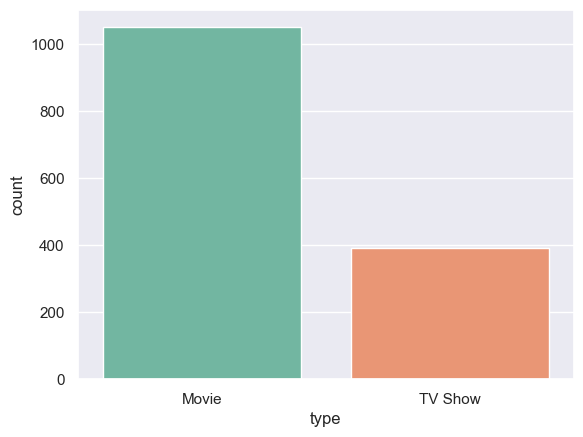

In [9]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=disney_overall, palette="Set2")

It is evident that there are more Movies on Disney than TV shows.

# Analysis of Movies on Disney

# Movie ratings analysis

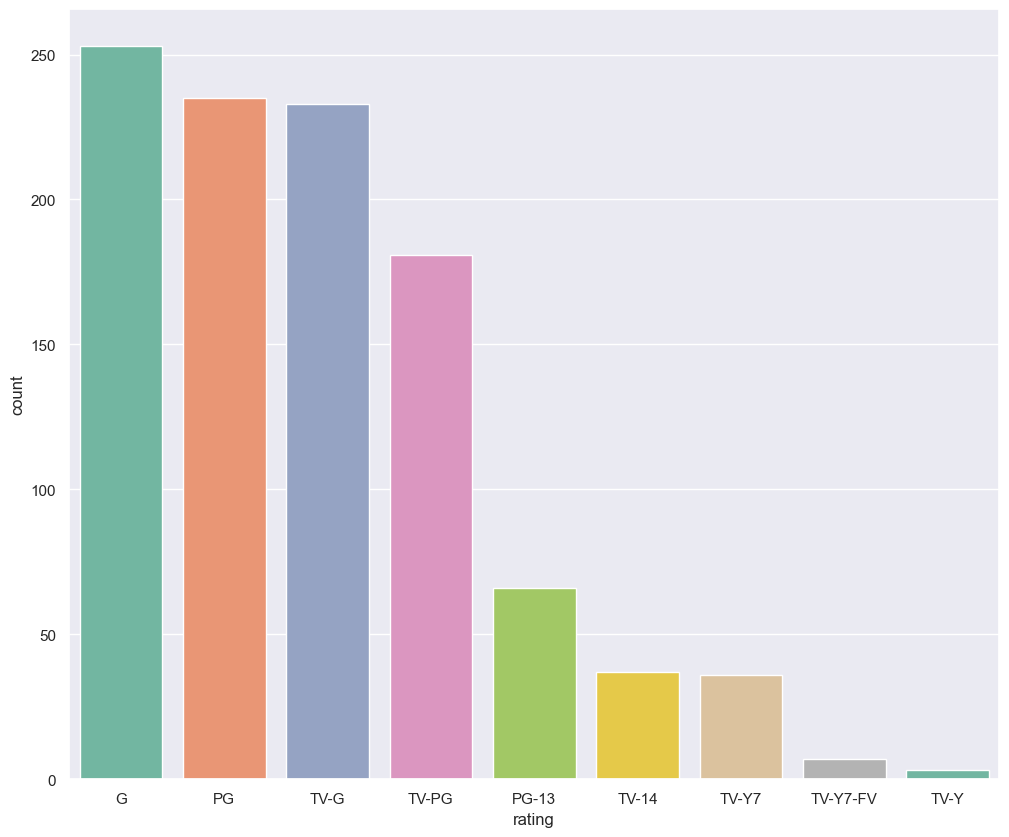

In [10]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=disney_movies, palette="Set2", order=disney_movies['rating'].value_counts().index[0:9])

The largest count of movies is made with a "G" rating. "G" - General audiences – All ages admitted.

Second, the largest is the "PG" which stands for content that Parental guidance suggested – Some material may not be suitable for pre-teenagers.

Third, the largest is the very popular "TV-G" rating. A TV-G-rated film is a film that has been assessed as suitable for all ages; these are not necessarily children's shows.

# Year wise analysis

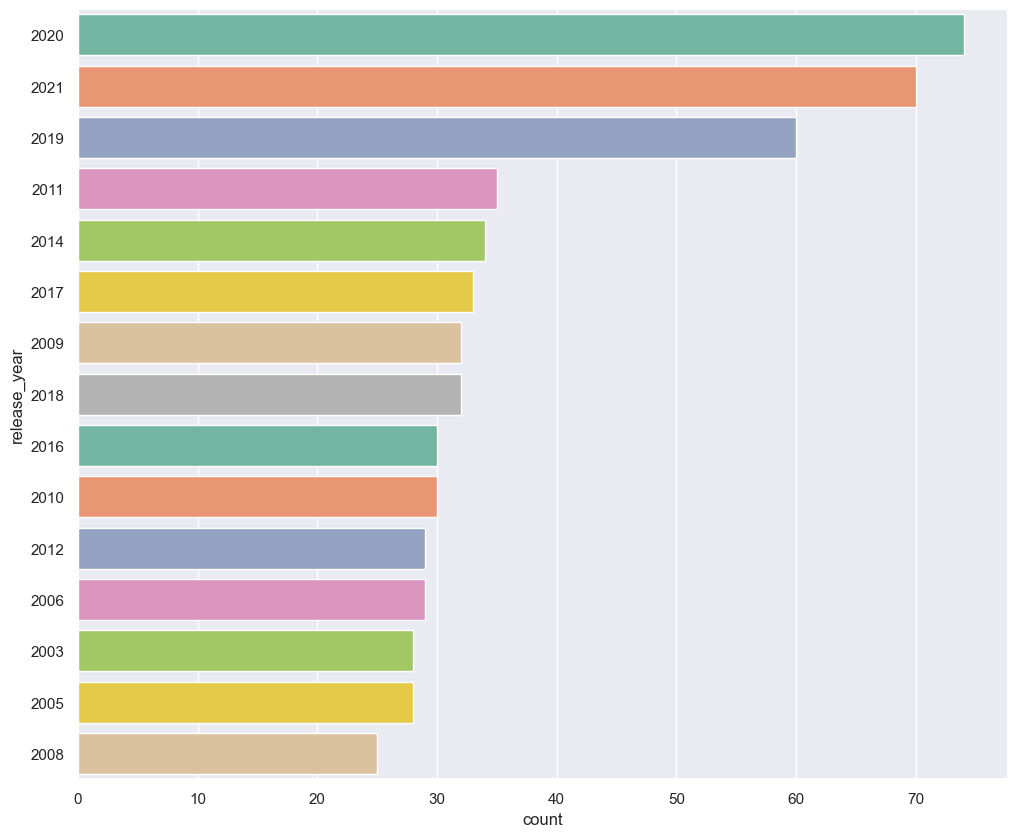

In [11]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=disney_movies, palette="Set2", order=disney_movies['release_year'].value_counts().index[0:15])

So, 2020 was the year when most of the movies were released.

In [12]:
countries = {}
cou = list(disney_movies['country'])
for i in cou:
    i = list(i.split(','))
    if len(i) == 1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [13]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}        
print(countries_fin)

{'Canada': 55, 'UnitedStates': 53, 'UnitedKingdom': 47, 'Australia': 20, 'France': 13, 'Germany': 8, 'China': 5, 'Spain': 4, 'Japan': 4, 'Ireland': 3, 'Hungary': 3, 'SouthAfrica': 3, 'HongKong': 3, 'Mexico': 3, 'India': 3, 'Taiwan': 3, 'NewZealand': 3, 'Denmark': 2, 'Poland': 2, 'Singapore': 2, 'Austria': 2, 'UnitedArabEmirates': 2, 'Malaysia': 2, 'Thailand': 1, 'Brazil': 1, 'Belgium': 1, 'Switzerland': 1, 'Tanzania': 1, 'Panama': 1, 'Angola': 1, 'Botswana': 1, 'Namibia': 1, 'SouthKorea': 1, 'Russia': 1, 'Kazakhstan': 1, 'Syria': 1, 'Iran': 1, 'Egypt': 1, 'Pakistan': 1, 'Norway': 1, 'Sweden': 1, 'Slovenia': 1, 'CzechRepublic': 1}


# Top 10 movie content creating countries

[Text(0, 0, 'Canada'),
 Text(1, 0, 'UnitedStates'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Australia'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Germany'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'Ireland')]

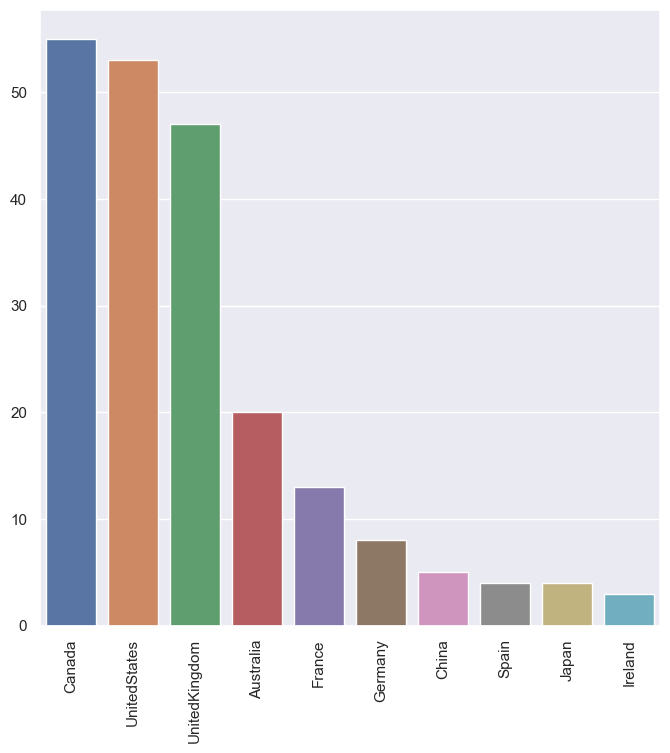

In [14]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x = list(countries_fin.keys())[0:10], y = list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

# Analysis of duration of movies

In [15]:
disney_movies['duration'] = disney_movies['duration'].str.replace(' min','')
disney_movies['duration']=disney_movies['duration'].astype(str).astype(int)
disney_movies['duration']

C:\Users\Asus\AppData\Local\Temp\ipykernel_6896\3738133327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_movies['duration'] = disney_movies['duration'].str.replace(' min','')
C:\Users\Asus\AppData\Local\Temp\ipykernel_6896\3738133327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_movies['duration']=disney_movies['duration'].astype(str).astype(int)


0        23
1        91
2        23
3        41
5        94
       ... 
1445    108
1446    106
1447    107
1448    112
1449      2
Name: duration, Length: 1051, dtype: int32

<AxesSubplot: xlabel='duration', ylabel='Density'>

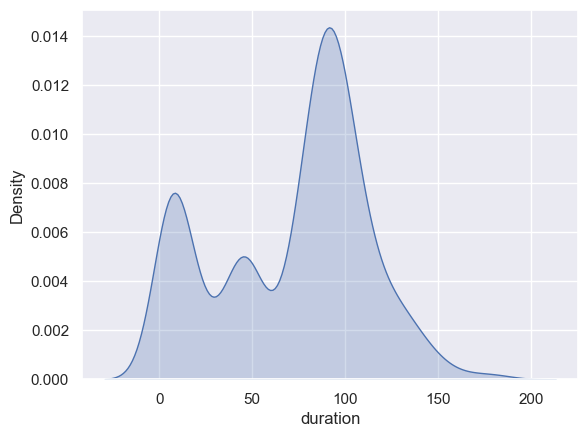

In [16]:
sns.set(style="darkgrid")
sns.kdeplot(data=disney_movies['duration'], fill=True)

So, a good amount of movies on Disney are among the duration of 60-125 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting.

In [17]:
from collections import Counter

genres=list(disney_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

# Number of movies classified by genres on Disney.

C:\Users\Asus\AppData\Local\Temp\ipykernel_6896\864650834.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 90)


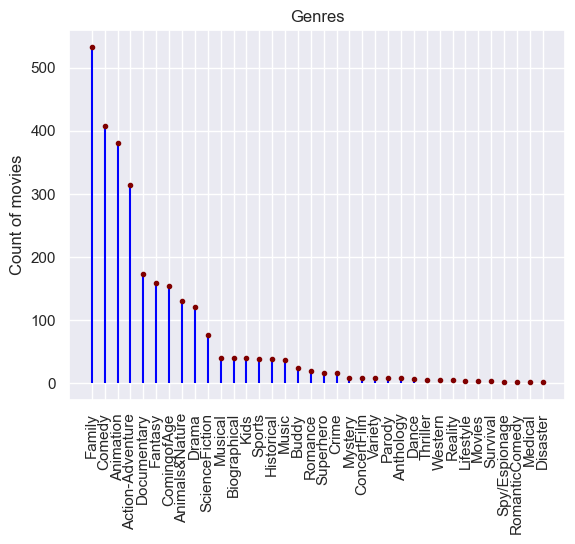

<Figure size 1000x1000 with 0 Axes>

In [18]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}

fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='blue')
ax.plot(x,y, ".", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

Therefore, it is clear that Family movies, Comedy and Animation are the top three genres that have the highest amount of content on Disney.

# Analysis of TV Shows on Disney

In [19]:
countries1={}
cou1=list(disney_shows['country'])
for i in cou1:
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

In [20]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

# Most content creating countries

<AxesSubplot: title={'center': 'Content creating countries'}>

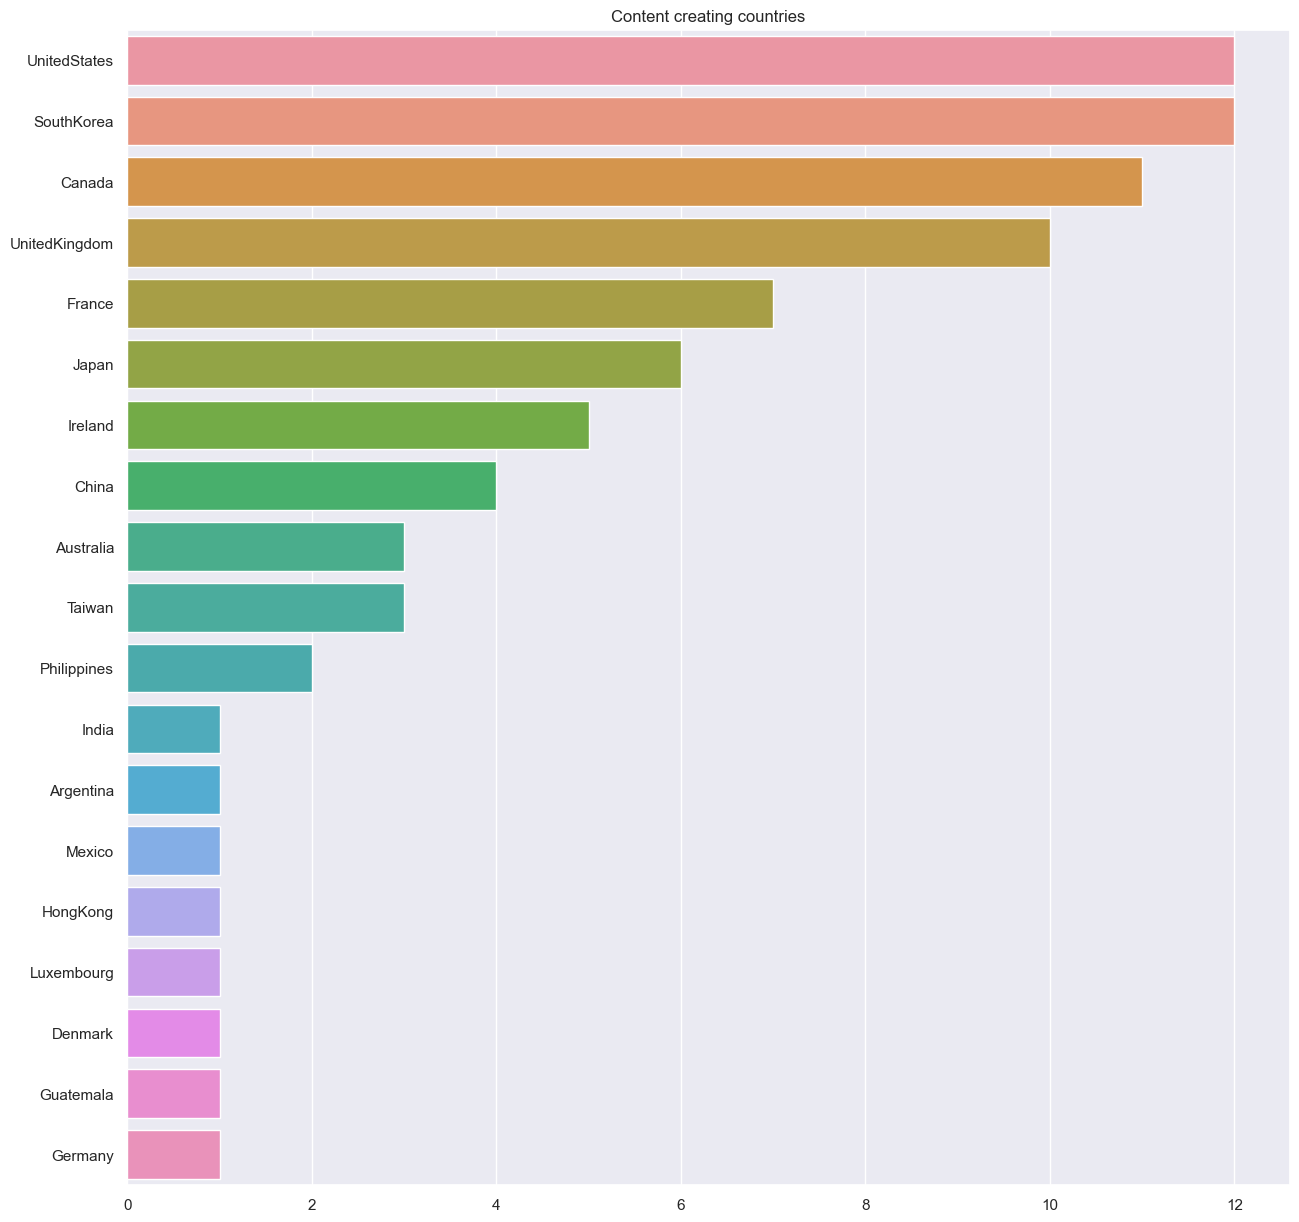

In [21]:
plt.figure(figsize=(15,15))
plt.title("Content creating countries")
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))

Naturally, United States has the most content that is created on Disney in the TV Show category.

In [22]:
features = ['title', 'duration']
durations = disney_shows[features]
durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

C:\Users\Asus\AppData\Local\Temp\ipykernel_6896\4098522109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
C:\Users\Asus\AppData\Local\Temp\ipykernel_6896\4098522109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
C:\Users\Asus\AppData\Local\Temp\ipykernel_6896\4098522109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

# TV shows with largest number of seasons

<AxesSubplot: xlabel='title'>

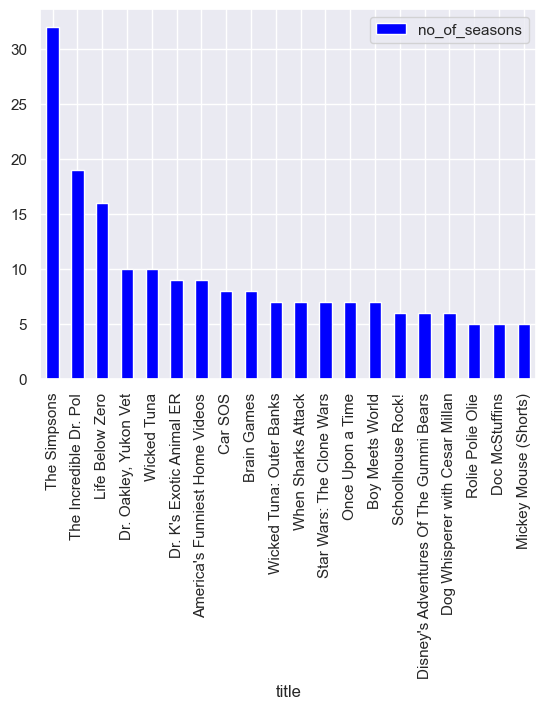

In [23]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue')

Thus, The Simpsons, The Incredible Dr.Pol and Life Below Zero are amongst the TV Shows that have the highest number of seasons.